In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [4]:
wine_dataset = pd.read_csv('/content/winequalityN.csv')

In [5]:
wine_dataset.shape

(6497, 13)

In [6]:
wine_dataset.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [61]:
a=wine_dataset.drop('type', axis=1)

In [62]:
a.isnull().sum()

,0
fixed acidity,10
volatile acidity,8
citric acid,3
residual sugar,2
chlorides,2
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,9
sulphates,4


In [63]:
a.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


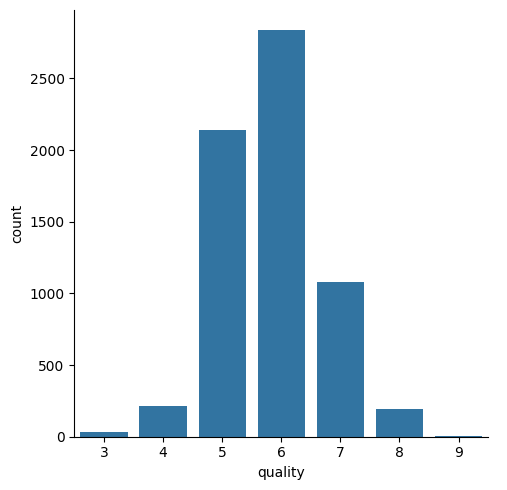

In [64]:
sns.catplot(x='quality' , data=a, kind='count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

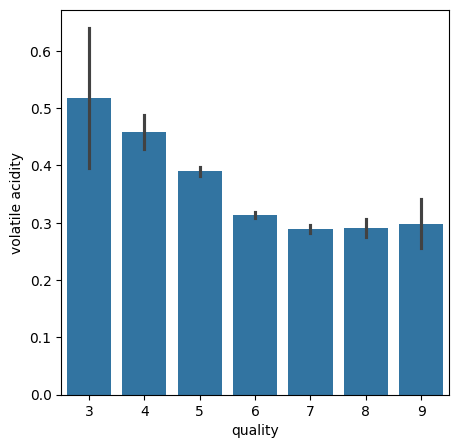

In [65]:
plot = plt.figure(figsize = (5,5))
sns.barplot(x='quality', y='volatile acidity' , data = a)

In [66]:
numerical_wine_dataset = a.select_dtypes(include=['number'])


In [67]:
correlation = numerical_wine_dataset.corr()

<Axes: >

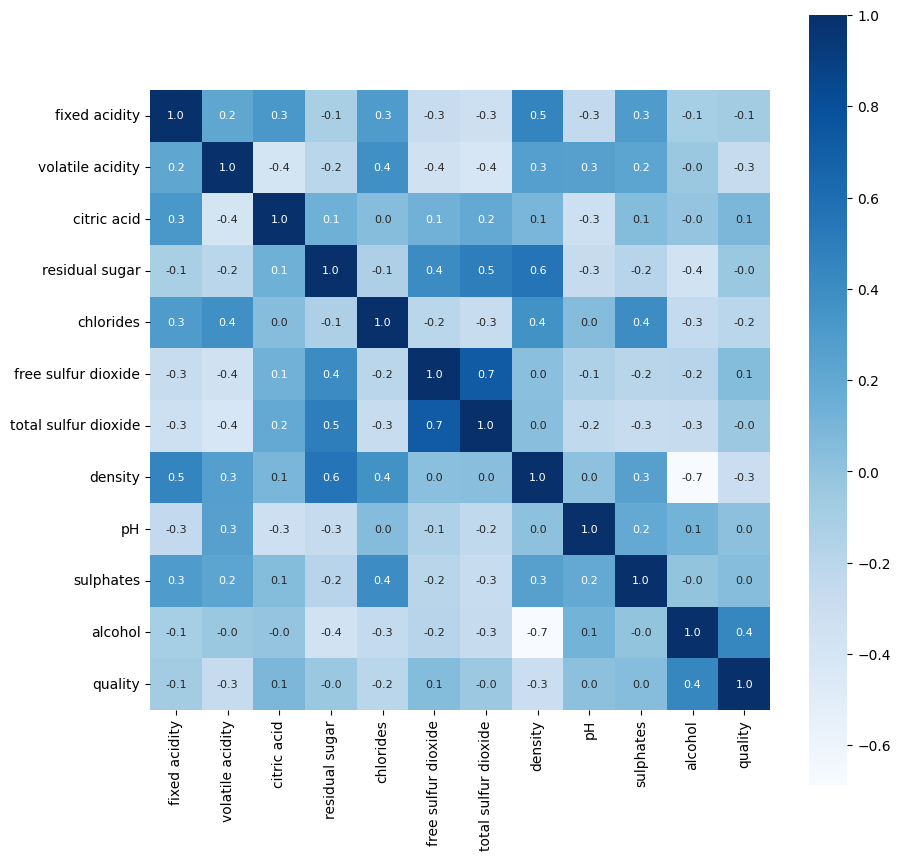

In [68]:
plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar=True , square = True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [69]:
X=a.drop('quality', axis=1)

In [70]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
6492            6.2             0.600         0.08             2.0      0.090   
6493            5.9             0.550         0.10             2.2      0.062   
6494            6.3             0.510         0.13             2.3      0.076   
6495            5.9             0.645         0.12             2.0      0.075   
6496            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [71]:
Y=a['quality'].apply(lambda y_value:1 if y_value>=7 else 0)

In [72]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: quality, Length: 6497, dtype: int64


In [73]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [74]:
print(Y.shape, Y_train.shape, Y_test.shape)

(6497,) (5197,) (1300,)


In [75]:
model =  RandomForestClassifier()

In [76]:
# Example for one-hot encoding
X_train = pd.get_dummies(X_train, columns=['fixed acidity'])
X_test = pd.get_dummies(X_test, columns=['fixed acidity'])

In [77]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

In [78]:
model.fit(X_train, Y_train)

RandomForestClassifier()

In [79]:
# Assuming 'X' is your original dataframe before splitting
categorical_features = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_features)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

In [80]:
model.fit(X_train , Y_train)

RandomForestClassifier()

In [81]:
X_test_prediction = model.predict(X_test)

In [82]:
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [83]:
print('Accuracy:' , test_data_accuracy)

Accuracy: 0.8884615384615384


In [88]:
input_data = (6.6,0.17,0.38,1.5,0.032,28,112,0.9914,3.25,0.55,11.4)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)

[1]


In [89]:
if prediction[0]==1:
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

Good Quality Wine
